### Answers to Assignment 3 of 230A

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Q2

(a)

$RHS=\frac{Var_t^Q(R_t)}{R_f}-Cov_t(M_{t,t+1}R_t, R_t)=\frac{E_t^Q(R_t^2)-E_t^Q(R_t)^2}{R_f}-E_t(M_{t,t+1}R_t^2)+E_t(M_{t,t+1}R_t)E_t(R_t)=\frac{E_t^Q(R_t^2)-R_f^2}{R_f}-\frac{E_t^Q(R_t^2)}{R_f}+E_t(R_t)=E_t(R_t)-R_f=LHS$

(b)

$Cov_t(M_{t,t+1}R_t^m, R_t^m)=E_t(M_{t,t+1}(R_t^m)^2)-E_t(M_{t,t+1}R_t^m)E_t(R_t^m)=E_t(a(R_t^m)^{2-\gamma})-E_t(R_t^m)$

$E_t(a(R_t^m)^{1-\gamma})=1$ => $\frac{1}{E_t((R_t^m)^{1-\gamma})}=a$ => $Cov_t(M_{t,t+1}R_t^m, R_t^m)=\frac{E_t((R_t^m)^{2-\gamma})}{E_t((R_t^m)^{1-\gamma})}-E_t(R_t^m)=\frac{Cov((R_t^m)^{1-\gamma}, R_t^m)}{E_t((R_t^m)^{1-\gamma})}$

Case 1: $1-\gamma = 0$, $Cov_t(M_{t,t+1}R_t^m, R_t^m)=0$

Case 2: $1-\gamma < 0$, $(R_t^m)^{1-\gamma}$ is decreasing w.r.t. $R_t^m$ so the covariance should be negative

$\therefore Cov_t(M_{t,t+1}R_t^m, R_t^m) \le 0$

### Q3

(a)

In [129]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
data = pd.read_csv("Factors.csv").rename(columns={"Unnamed: 0": "time"})
subdata1 = data.loc[data["time"]<=196312]
subdata2 = data.loc[data["time"]>196312]

In [104]:
def analyse_excess_returns(dt):
    excess_return = dt.copy(deep=True).drop(columns=["time"])
    normal_return = dt.copy(deep=True).drop(columns=["time", "Rf"])
    for col in excess_return.columns:
        excess_return[col] = excess_return[col] - excess_return["Rf"]
    rf = np.mean(dt["Rf"])
    excess_return = excess_return.drop(columns=["Rf"])
    print("Mean Excess Return")
    print(excess_return.mean())
    print()
    print("Cov Excess Return")
    print(excess_return.cov())
    print()
    optimized_inv_w_rf = np.dot(np.linalg.inv(np.array(normal_return.cov())),(np.array(normal_return.mean())-np.ones(len(normal_return.mean()))*rf))
    optimized_ret_w_rf = np.dot(optimized_inv_w_rf.T, np.array(normal_return.mean()))/np.sum(optimized_inv_w_rf)
    optimized_vol_w_rf = np.sqrt(np.dot(optimized_inv_w_rf.T/np.sum(optimized_inv_w_rf), np.dot(normal_return.cov(), optimized_inv_w_rf/np.sum(optimized_inv_w_rf))))
    optimized_inv_wo_rf = np.dot(np.linalg.inv(np.array(normal_return.cov())),(np.array(normal_return.mean())))
    optimized_ret_wo_rf = np.dot(optimized_inv_wo_rf.T, np.array(normal_return.mean()))/np.sum(optimized_inv_wo_rf)
    optimized_vol_wo_rf = np.sqrt(np.dot(optimized_inv_wo_rf.T/np.sum(optimized_inv_wo_rf), np.dot(normal_return.cov(), optimized_inv_wo_rf/np.sum(optimized_inv_wo_rf))))
    return normal_return.mean(), normal_return.cov(), optimized_ret_wo_rf, optimized_ret_w_rf, optimized_vol_wo_rf, optimized_vol_w_rf

##### PART I for (a)

**Total Sample**

Mean Excess Return
Small-Low     0.711357
Small-High    1.154747
Big-Low       0.678565
Big-High      0.919956
Market        0.681852
dtype: float64

Cov Excess Return
            Small-Low  Small-High    Big-Low   Big-High     Market
Small-Low   56.003226   54.042702  33.794311  43.120793  35.575840
Small-High  54.042702   65.891410  33.610744  53.130587  37.512278
Big-Low     33.794311   33.610744  28.162277  31.178359  27.714287
Big-High    43.120793   53.130587  31.178359  50.930634  34.445236
Market      35.575840   37.512278  27.714287  34.445236  28.532315

Sharpe Ratio for Tangency Portfolio: 0.18986019557843042

Sharpe Ratio for Market Portfolio: 0.12790229056673896


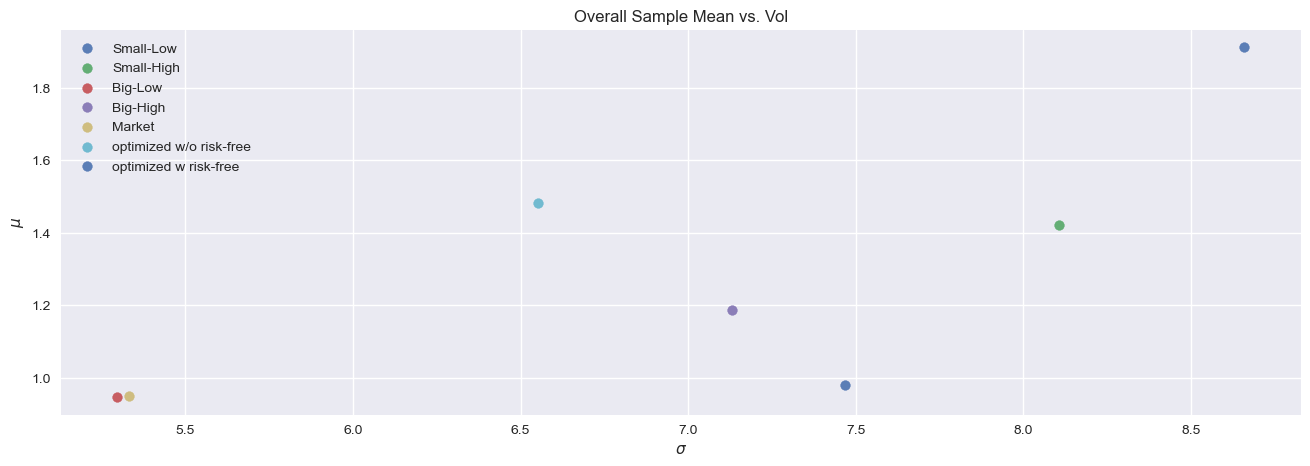

In [108]:
total_mean, total_cov, optimized_ret_wo_rf, optimized_ret_w_rf, optimized_vol_wo_rf, optimized_vol_w_rf = analyse_excess_returns(data)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
for i in range(len(total_mean)):
    axes.scatter(np.sqrt(total_cov.iloc[i,i]), total_mean.iloc[i], alpha=0.9, label=total_mean.index[i])
axes.scatter(optimized_vol_wo_rf, optimized_ret_wo_rf, alpha=0.9, label="optimized w/o risk-free")
axes.scatter(optimized_vol_w_rf, optimized_ret_w_rf, alpha=0.9, label="optimized w risk-free")
axes.legend()
axes.set_title("Overall Sample Mean vs. Vol")
axes.set_xlabel(r'$\sigma$')
axes.set_ylabel(r'$\mu$')
print("Sharpe Ratio for Tangency Portfolio:", (optimized_ret_w_rf-data["Rf"].mean())/optimized_vol_w_rf)
print()
print("Sharpe Ratio for Market Portfolio:", (data["Market"].mean()-data["Rf"].mean())/data["Market"].std())
plt.show()

**Pre 1963/12 Sample**

Mean Excess Return
Small-Low     0.943139
Small-High    1.432040
Big-Low       0.836229
Big-High      1.226887
Market        0.861200
dtype: float64

Cov Excess Return
            Small-Low  Small-High    Big-Low   Big-High     Market
Small-Low   70.116934   84.568646  45.684646  71.560908  49.320278
Small-High  84.568646  117.381689  55.869422  97.230716  62.563793
Big-Low     45.684646   55.869422  38.442274  51.931127  39.444408
Big-High    71.560908   97.230716  51.931127  90.803364  57.759619
Market      49.320278   62.563793  39.444408  57.759619  41.730224

Sharpe Ratio for Tangency Portfolio: 0.16004721500000238

Sharpe Ratio for Market Portfolio: 0.13337154196423318


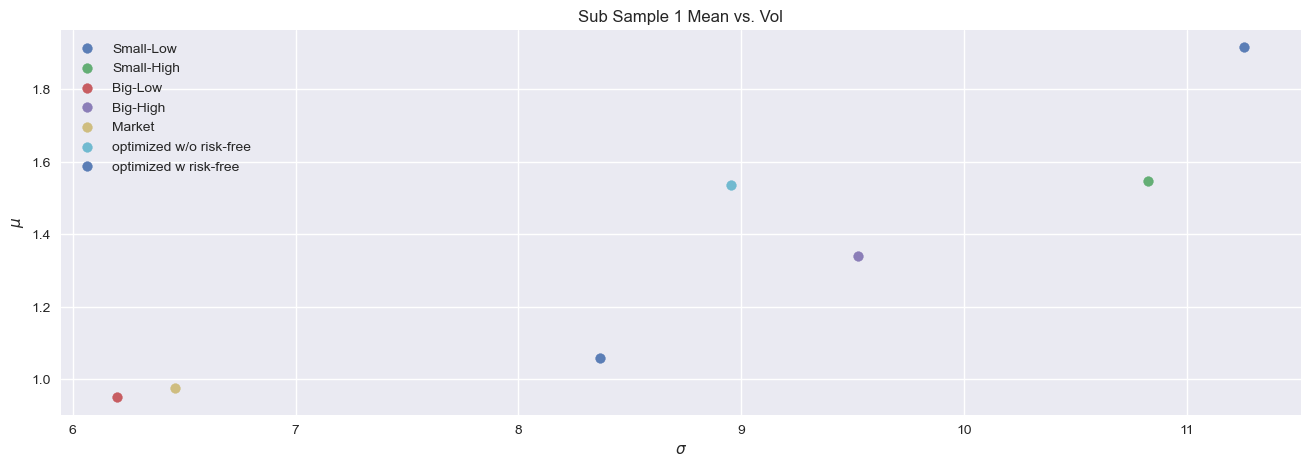

In [112]:
total_mean, total_cov, optimized_ret_wo_rf, optimized_ret_w_rf, optimized_vol_wo_rf, optimized_vol_w_rf = analyse_excess_returns(subdata1)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
for i in range(len(total_mean)):
    axes.scatter(np.sqrt(total_cov.iloc[i,i]), total_mean.iloc[i], alpha=0.9, label=total_mean.index[i])
axes.scatter(optimized_vol_wo_rf, optimized_ret_wo_rf, alpha=0.9, label="optimized w/o risk-free")
axes.scatter(optimized_vol_w_rf, optimized_ret_w_rf, alpha=0.9, label="optimized w risk-free")
axes.legend()
axes.set_title("Sub Sample 1 Mean vs. Vol")
axes.set_xlabel(r'$\sigma$')
axes.set_ylabel(r'$\mu$')
print("Sharpe Ratio for Tangency Portfolio:", (optimized_ret_w_rf-subdata1["Rf"].mean())/optimized_vol_w_rf)
print()
print("Sharpe Ratio for Market Portfolio:", (subdata1["Market"].mean()-subdata1["Rf"].mean())/subdata1["Market"].std())
plt.show()

**Post 1963/12 Sample**

Mean Excess Return
Small-Low     0.566895
Small-High    0.981919
Big-Low       0.580298
Big-High      0.728655
Market        0.570069
dtype: float64

Cov Excess Return
            Small-Low  Small-High    Big-Low   Big-High     Market
Small-Low   47.237215   35.042627  26.399499  25.397552  27.023771
Small-High  35.042627   33.839523  19.751560  25.654861  21.913185
Big-Low     26.399499   19.751560  21.774324  18.248867  20.419189
Big-High    25.397552   25.654861  18.248867  26.075238  19.918296
Market      27.023771   21.913185  20.419189  19.918296  20.320351

Sharpe Ratio for Tangency Portfolio: 0.26588687368931313

Sharpe Ratio for Market Portfolio: 0.12686445804040583


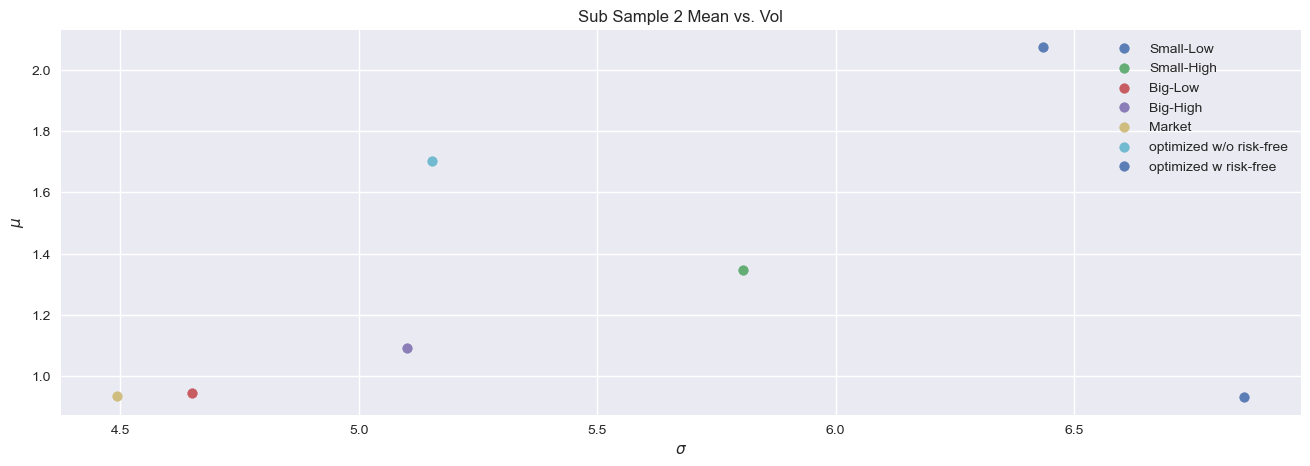

In [111]:
total_mean, total_cov, optimized_ret_wo_rf, optimized_ret_w_rf, optimized_vol_wo_rf, optimized_vol_w_rf = analyse_excess_returns(subdata2)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
for i in range(len(total_mean)):
    axes.scatter(np.sqrt(total_cov.iloc[i,i]), total_mean.iloc[i], alpha=0.9, label=total_mean.index[i])
axes.scatter(optimized_vol_wo_rf, optimized_ret_wo_rf, alpha=0.9, label="optimized w/o risk-free")
axes.scatter(optimized_vol_w_rf, optimized_ret_w_rf, alpha=0.9, label="optimized w risk-free")
axes.legend()
axes.set_title("Sub Sample 2 Mean vs. Vol")
axes.set_xlabel(r'$\sigma$')
axes.set_ylabel(r'$\mu$')
print("Sharpe Ratio for Tangency Portfolio:", (optimized_ret_w_rf-subdata2["Rf"].mean())/optimized_vol_w_rf)
print()
print("Sharpe Ratio for Market Portfolio:", (subdata2["Market"].mean()-subdata2["Rf"].mean())/subdata2["Market"].std())
plt.show()

##### PART II for (a)

**Total Sample**

Alphas
Small-Low    -0.138075
Small-High    0.258215
Big-Low       0.016407
Big-High      0.096121
Market        0.000000
dtype: float64


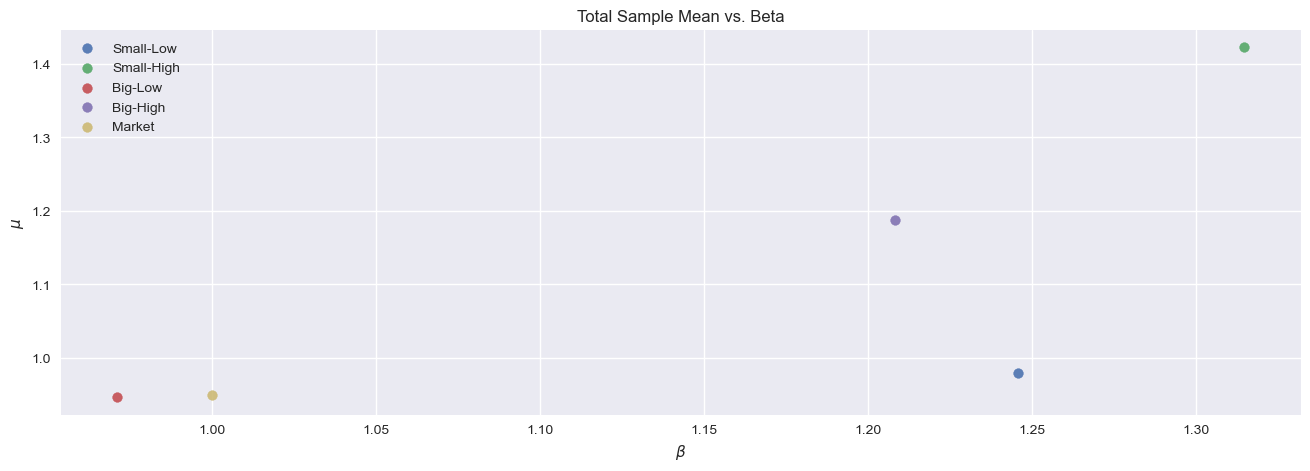

In [121]:
betas = data.drop(columns=["time", "Rf"]).cov().loc[:, "Market"] / data.drop(columns=["time", "Rf"]).cov().loc["Market", "Market"]
returns = data.drop(columns=["time", "Rf"]).mean()
alphas = (returns - data["Rf"].mean()) - betas * (returns.loc["Market"]-data["Rf"].mean())
print("Alphas")
print(alphas)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
for i in range(len(returns)):
    axes.scatter(betas.iloc[i], returns.iloc[i], alpha=0.9, label=returns.index[i])
axes.legend()
axes.set_title("Total Sample Mean vs. Beta")
axes.set_xlabel(r'$\beta$')
axes.set_ylabel(r'$\mu$')
plt.show()

**Pre 1963/12 Sample**

Alphas
Small-Low    -0.073542
Small-High    0.141840
Big-Low       0.022090
Big-High      0.035108
Market        0.000000
dtype: float64


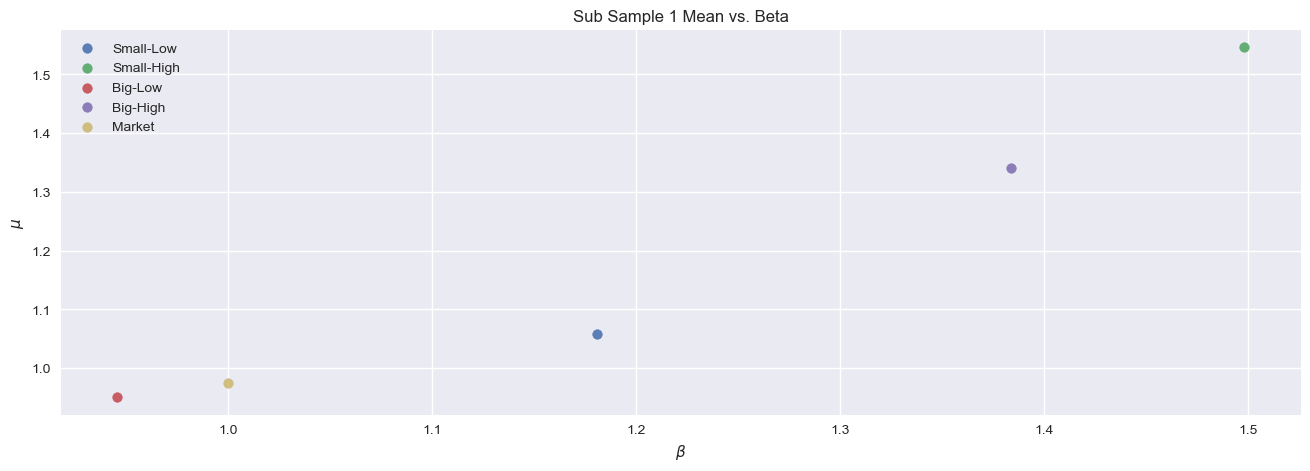

In [125]:
betas = subdata1.drop(columns=["time", "Rf"]).cov().loc[:, "Market"] / subdata1.drop(columns=["time", "Rf"]).cov().loc["Market", "Market"]
returns = subdata1.drop(columns=["time", "Rf"]).mean()
alphas = (returns - subdata1["Rf"].mean()) - betas * (returns.loc["Market"]-subdata1["Rf"].mean())
print("Alphas")
print(alphas)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
for i in range(len(returns)):
    axes.scatter(betas.iloc[i], returns.iloc[i], alpha=0.9, label=returns.index[i])
axes.legend()
axes.set_title("Sub Sample 1 Mean vs. Beta")
axes.set_xlabel(r'$\beta$')
axes.set_ylabel(r'$\mu$')
plt.show()

**Post 1963/12 Sample**

Alphas
Small-Low    -0.191068
Small-High    0.366796
Big-Low       0.007791
Big-High      0.168717
Market        0.000000
dtype: float64


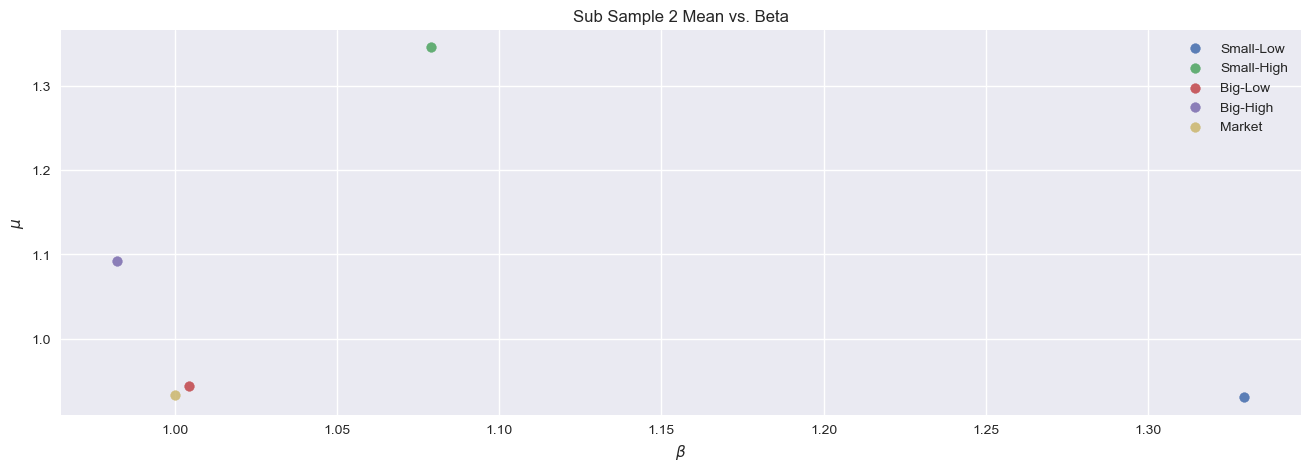

In [124]:
betas = subdata2.drop(columns=["time", "Rf"]).cov().loc[:, "Market"] / subdata2.drop(columns=["time", "Rf"]).cov().loc["Market", "Market"]
returns = subdata2.drop(columns=["time", "Rf"]).mean()
alphas = (returns - subdata2["Rf"].mean()) - betas * (returns.loc["Market"]-subdata2["Rf"].mean())
print("Alphas")
print(alphas)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
for i in range(len(returns)):
    axes.scatter(betas.iloc[i], returns.iloc[i], alpha=0.9, label=returns.index[i])
axes.legend()
axes.set_title("Sub Sample 2 Mean vs. Beta")
axes.set_xlabel(r'$\beta$')
axes.set_ylabel(r'$\mu$')
plt.show()

We could observe that market excess return this fundamental factor could not determine the expected return completely. We could see that Small-Low, Small-High, Big-High and Big-Low portfolios have non zero alphas and the alphas vary from time to time.

(b)

##### PART I for (b)

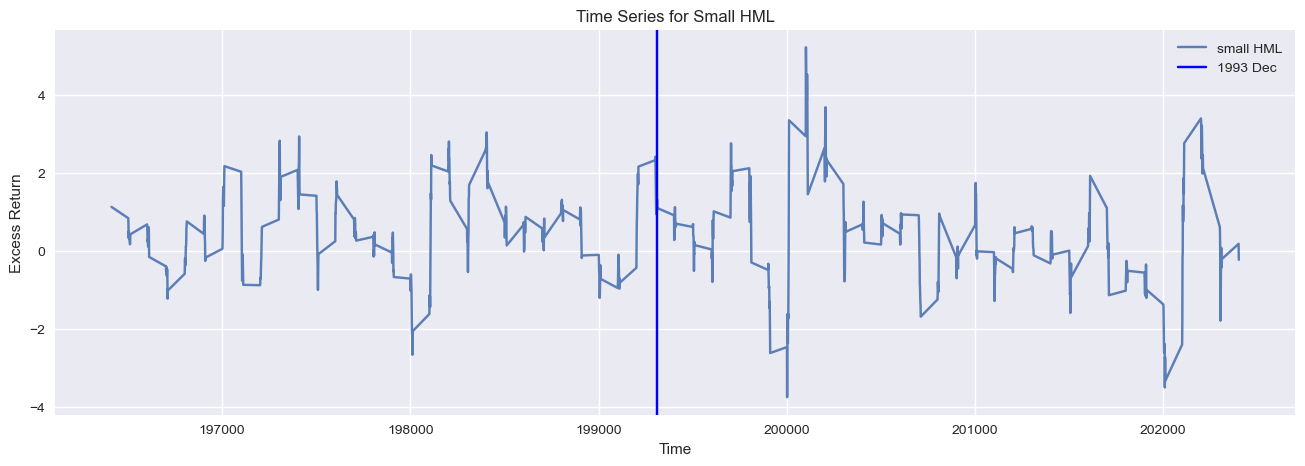

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
axes.plot(subdata2["time"], (subdata2["Small-High"]-subdata2["Small-Low"]).rolling(12).mean(), alpha=0.9, label="small HML")
axes.axvline(x = 199312, color = 'b', label = '1993 Dec')
axes.legend()
axes.set_title("Time Series for Small HML")
axes.set_xlabel("Time")
axes.set_ylabel("Excess Return")
plt.show()

We could see that before 1993 Dec the excess return of small HML is not as volatile as post-1993 Dec.

##### PART II for (b)

In [138]:
print("Mean & Std. & Sharpe Ratio for Market Portfolio")
print()
time_division = 199312
ret_period1=subdata2.loc[subdata2["time"]<=time_division,"Market"]-subdata2.loc[subdata2["time"]<=time_division,"Rf"]
ret_period2=subdata2.loc[subdata2["time"]>time_division,"Market"]-subdata2.loc[subdata2["time"]>time_division,"Rf"]
print("1964/01-1993/12")
print(f"mean={ret_period1.mean()}, std={ret_period1.std()}, sharpe raio={ret_period1.mean()/ret_period1.std()}")
print("1994/01-2024/02")
print(f"mean={ret_period2.mean()}, std={ret_period2.std()}, sharpe raio={ret_period2.mean()/ret_period2.std()}")
print()
print("Mean & Std. & Sharpe Ratio for Small HML")
print()
hml_period1=subdata2.loc[subdata2["time"]<=time_division,"Small-High"]-subdata2.loc[subdata2["time"]<=time_division,"Small-Low"]
hml_period2=subdata2.loc[subdata2["time"]>time_division,"Small-High"]-subdata2.loc[subdata2["time"]>time_division,"Small-Low"]
print("1964/01-1993/12")
print(f"mean={hml_period1.mean()}, std={hml_period1.std()}, sharpe raio={hml_period1.mean()/hml_period1.std()}")
print("1994/01-2024/02")
print(f"mean={hml_period2.mean()}, std={hml_period2.std()}, sharpe raio={hml_period2.mean()/hml_period2.std()}")

Mean & Std. & Sharpe Ratio for Market Portfolio

1964/01-1993/12
mean=0.40874999999999995, std=4.495393909294429, sharpe raio=0.09092640339145608
1994/01-2024/02
mean=0.7304972375690608, std=4.520624485118113, sharpe raio=0.16159210745636057

Mean & Std. & Sharpe Ratio for Small HML

1964/01-1993/12
mean=0.5342047222222222, std=2.8326643514198673, sharpe raio=0.18858737073965473
1994/01-2024/02
mean=0.29650165745856344, std=3.7342651088548253, sharpe raio=0.07940026988321958


##### PART III for (b)

In [143]:
def quarterly_agg_data(data):
    mapping = {1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:4,11:4,12:4}
    dt = data.copy(deep=True)
    dt["year"] = dt["time"]//100
    dt["quarter"] = dt["time"].apply(lambda x: mapping[int(x % 100)])
    dt["small_high_ret"] = dt["Small-High"].apply(lambda x: x/100+1)
    dt["small_low_ret"] = dt["Small-Low"].apply(lambda x: x/100+1)
    output = dt.groupby(["year","quarter"])[["small_high_ret","small_low_ret"]].prod().reset_index()
    output["small_high_ret"] = output["small_high_ret"].apply(lambda x: (x-1)*100)
    output["small_low_ret"] = output["small_low_ret"].apply(lambda x: (x-1)*100)
    return output

def acf(data, lags=12):
    output = [1.0]
    for i in range(lags):
        output.append(np.corrcoef(data.iloc[:-(i+1)], data.iloc[(i+1):])[1,0])
    return output

In [150]:
quarterly_data = quarterly_agg_data(subdata2)
quarterly_data1 = quarterly_data.loc[(quarterly_data["year"] <= 1993)]
quarterly_data1.loc[quarterly_data1.index,"HML"] = quarterly_data1["small_high_ret"] - quarterly_data1["small_low_ret"]
print("ACF - Quarterly Small HML 1964/01-1993/12")
print(acf(quarterly_data1["HML"]))
print()
quarterly_data2 = quarterly_data.loc[(quarterly_data["year"] > 1993)]
quarterly_data2.loc[quarterly_data2.index,"HML"] = quarterly_data2["small_high_ret"] - quarterly_data2["small_low_ret"]
print("ACF - Quarterly Small HML 1994/01-2024/02")
print(acf(quarterly_data2["HML"]))
print()


ACF - Quarterly Small HML 1964/01-1993/12
[1.0, -0.008939529764301585, 0.028054378647092305, -0.019859707762694575, 0.060356077080099775, -0.13248565534045914, -0.04062074889856597, -0.07917342618945454, 0.024936757725681626, -0.052218978403120654, -0.02864024642183832, 0.024031566102509987, 0.0440190377053788]

ACF - Quarterly Small HML 1994/01-2024/02
[1.0, 0.13790172962835054, 0.021902522244057664, 0.03138044532001137, -0.1080611446447632, -0.03374461635952825, 0.12889720868330518, -0.11306765332891547, -0.17448769400887415, -0.13753561717564572, -0.11291942803193948, 0.036032285095691556, 0.09196198641268358]



/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_93007/2223390617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data1.loc[quarterly_data1.index,"HML"] = quarterly_data1["small_high_ret"] - quarterly_data1["small_low_ret"]
/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_93007/2223390617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data2.loc[quarterly_data2.index,"HML"] = quarterly_data2["small_high_ret"] - quarterly_data2["small_low_ret"]


##### PART IV for (b)

We could observe that in the second period of time ACF of quarterly HML excess return shows positive correlation in short terms while negative correlation in long terms. And we could see that for small HML, the excess return shows smaller mean value after 1994/01 with larger volatility potentially because of capital flow and squeezed excess return mentioned in the question. All the evidence shows that the quantitative investment could have some impacts on assets' excess return and its pattern.